In [1]:
import argparse
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
digits = 10

test = np.load('test.npz')
train = np.load('train.npz')

y_test = test['label']
x_test = test['image']
y_train = train['label']
x_train = train['image']

x_train = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X = np.vstack((x_train, x_test))
y = np.vstack((y_train, y_test))

examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)
  #print(y)

m = x_train.shape[0]
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:, :m], Y_new[:, m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [3]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s


In [4]:
def sigmoid_gradient(z):
#     # To prevent from overflow
#     z = np.clip(z, 1e-15, 1 - 1e-15)
    s = sigmoid(z) * (1 - sigmoid(z))
    return s


In [5]:
def cross_entropy(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

In [6]:
def cross_entropy_gradient(Y, Y_hat):
    L = Y_hat - Y
    return L

In [7]:
def softmax(z):
    s = np.exp(z) / np.sum(np.exp(z), axis=0)
    return s

In [8]:
def evaluation(predicts, golds):
    correct = 0
    total = len(predicts)
    assert len(predicts) == len(golds)
    for predict, gold in zip(predicts, golds):
        if predict == gold:
            correct += 1
    accurancy = correct / total
    return accurancy

In [9]:
# class Layer:
#     def __init__(self, input_, output):
#         self.input = input_
#         self.output = output  # number of layer node
#         self.W = np.random.randn(self.output, self.input) * np.sqrt(1. / self.input)
#         self.b = np.zeros((self.output, 1)) * np.sqrt(1. / self.input)
        
#     def forward(self, last_layer):
#         self.last_layer = last_layer
#         layer_output_temp = np.matmul(self.W, self.last_layer) + self.b
#         layer_output = sigmoid(layer_output_temp)
#         return layer_output
    
#     def back_propagation(self, CE_gradientorgradient, m_batch, learning_rate):
#         W_temp = self.W
#         W_gradient = (1. / m_batch) * np.matmul(CE_gradientorgradient, self.last_layer.T)
#         b_gradient = (1. / m_batch) * np.sum(CE_gradientorgradient, axis=1, keepdims=True)
#         self.W_new = self.W - learning_rate * W_gradient
#         self.b_new = self.b - learning_rate * b_gradient
#         self.W = self.W_new
#         self.b = self.b_new
#         gradient_temp = np.matmul(W_temp.T, CE_gradientorgradient)
#         return gradient_temp
        
    
    

In [10]:
# hiddenlayer1 = Layer(784, 400)
# hiddenlayer2 = Layer(400, 400)
# outputlayer = Layer(400, 10)

In [11]:
# def SGD_train_epoch(X_train, Y_train, batch_size = 64, epoch = 10, learning_rate = 0.03):
#     for i in range(epoch):
       
#         # shuffle training set
#         permutation = np.random.permutation(X_train.shape[1])
#         X_train_shuffled = X_train[:, permutation]
#         Y_train_shuffled = Y_train[:, permutation]
    
#         batch_num = len(X_train) // batch_size
#         predicts = []
#         golds = []
#         predicts_test = []
#         golds_test = []
        
#         for j in range(batch_num):
#             begin = j * batch_size
#             end = min(begin + batch_size, X_train.shape[1] - 1)
#             X = X_train_shuffled[:, begin:end]
#             Y = Y_train_shuffled[:, begin:end]
#             m_batch = end - begin
            
#             output1_temp = hiddenlayer1.forward(X)
#             output1 = sigmoid(output1_temp)
#             output2_temp = hiddenlayer2.forward(output1)
#             output2 = sigmoid(output2_temp)
#             y_hat_temp = outputlayer.forward(output2)
#             y_hat = softmax(y_hat_temp)
#             #print(y_hat)
            
#             predicts += np.argmax(y_hat, axis = 0).tolist()
#             golds += np.argmax(Y, axis = 0).tolist()
            
#             loss = cross_entropy(Y, y_hat)
#             gradient = cross_entropy_gradient(Y, y_hat)
            
#             back_output1 = outputlayer.back_propagation(gradient, m_batch, learning_rate)
#             back_output2_temp = sigmoid_gradient(output2_temp) * back_output1
#             back_output2 = hiddenlayer2.back_propagation(back_output2_temp, m_batch, learning_rate)
#             back_output3_temp = sigmoid_gradient(output1_temp) * back_output2
#             back_output3 = hiddenlayer1.back_propagation(back_output3_temp, m_batch, learning_rate)
        
#         print('Epoch : ', i + 1, 'training_loss = ', loss, 'train_accur = ', evaluation(predicts, golds))
            
            


In [12]:
#SGD_train_epoch(X_train, Y_train, batch_size = 64, epoch = 1000, learning_rate = 0.01)

In [13]:
parameters = {"W1": np.random.randn(400, 784) * np.sqrt(1. / 784),
              "b1": np.zeros((400, 1)) * np.sqrt(1. / 784),
              "W2": np.random.randn(400, 400) * np.sqrt(1. / 400),
              "b2": np.zeros((400, 1)) * np.sqrt(1. / 400),
              "W3": np.random.randn(digits, 400) * np.sqrt(1. / 400),
              "b3": np.zeros((digits, 1)) * np.sqrt(1. / 400)}


In [14]:
def forward(X, parameters):
    inoutput = {}
    inoutput["hiddenlayer1_output_temp"] = np.matmul(parameters["W1"], X) + parameters["b1"]
    inoutput["hiddenlayer1_output"] = sigmoid(inoutput["hiddenlayer1_output_temp"])
    
    inoutput["hiddenlayer2_output_temp"] = np.matmul(parameters["W2"], inoutput["hiddenlayer1_output"]) + parameters["b2"]
    inoutput["hiddenlayer2_output"] = sigmoid(inoutput["hiddenlayer2_output_temp"])
    
    inoutput["outputlayer_output_temp"] = np.matmul(parameters["W3"], inoutput["hiddenlayer2_output"]) + parameters["b3"]
    inoutput["outputlayer_output"] = softmax(inoutput["outputlayer_output_temp"])
    #inoutput["outputlayer_output"] = y_hat

    return inoutput

In [15]:
def back_propagation(X, Y, parameters, inoutput, m_batch):
    CE_gradient = inoutput["outputlayer_output"] - Y

    W3_gradient = (1. / m_batch) * np.matmul(CE_gradient, inoutput["hiddenlayer2_output"].T)
    b3_gradient = (1. / m_batch) * np.sum(CE_gradient, axis=1, keepdims=True)

    # ---

    outputlayer_backward_output = np.matmul(parameters["W3"].T, CE_gradient)
    hiddenlayer2_backward_input = outputlayer_backward_output * sigmoid_gradient(inoutput["hiddenlayer2_output_temp"])

    W2_gradient = (1. / m_batch) * np.matmul(hiddenlayer2_backward_input, inoutput["hiddenlayer1_output"].T)
    b2_gradient = (1. / m_batch) * np.sum(hiddenlayer2_backward_input, axis=1, keepdims=True)

    # ---

    hiddenlayer2_backward_output = np.matmul(parameters["W2"].T, hiddenlayer2_backward_input)
    hiddenlayer1_backward_input = hiddenlayer2_backward_output * sigmoid_gradient(inoutput["hiddenlayer1_output_temp"])

    W1_gradient = (1. / m_batch) * np.matmul(hiddenlayer1_backward_input, X.T)
    b1_gradient = (1. / m_batch) * np.sum(hiddenlayer1_backward_input, axis=1, keepdims=True)

    Wb_gradients = {"W1_gradient": W1_gradient, "b1_gradient": b1_gradient, "W2_gradient": W2_gradient,
                     "b2_gradient": b2_gradient, "W3_gradient": W3_gradient, "b3_gradient": b3_gradient}

    return Wb_gradients

/home/bunlab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 1: training loss = 2.19194169068331,  test loss = 2.1997713139164023, Train_accur = 0.28725,Test_accur = 0.27063106796116504


AttributeError: 'list' object has no attribute 'shape'

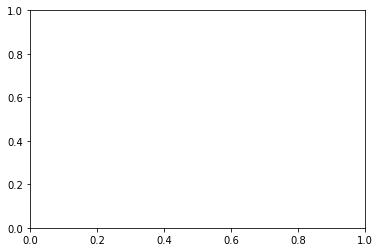

In [16]:
if __name__ == "__main__":
    epoch = 3
    batch_size = 64
    TrainError = []
    TestError = []
    for i in range(epoch):
       
        # shuffle training set
        permutation = np.random.permutation(X_train.shape[1])
        X_train_shuffled = X_train[:, permutation]
        Y_train_shuffled = Y_train[:, permutation]
    
        batch_num = len(X_train) // batch_size
        predicts = []
        golds = []
        predicts_test = []
        golds_test = []
        learning_rate = 0.03
        
        
        for j in range(batch_num):
            begin = j * batch_size
            end = min(begin + batch_size, X_train.shape[1] - 1)
            X = X_train_shuffled[:, begin:end]
            Y = Y_train_shuffled[:, begin:end]
            m_batch = end - begin
            
            inoutput = forward(X, parameters)
            Wb_gradients = back_propagation(X, Y, parameters, inoutput, m_batch)
            
            W1_gradient = Wb_gradients["W1_gradient"]
            b1_gradient = Wb_gradients["b1_gradient"]
            W2_gradient = Wb_gradients["W2_gradient"]
            b2_gradient = Wb_gradients["b2_gradient"]
            W3_gradient = Wb_gradients["W3_gradient"]
            b3_gradient = Wb_gradients["b3_gradient"]
            
            parameters["W1"] = parameters["W1"] - learning_rate * W1_gradient
            parameters["b1"] = parameters["b1"] - learning_rate * b1_gradient
            parameters["W2"] = parameters["W2"] - learning_rate * W2_gradient
            parameters["b2"] = parameters["b2"] - learning_rate * b2_gradient
            parameters["W3"] = parameters["W3"] - learning_rate * W3_gradient
            parameters["b3"] = parameters["b3"] - learning_rate * b3_gradient
            
            
          
        inoutput = forward(X_train, parameters)
        #print(Y.shape)
        
        #print(inoutput["outputlayer_output"].shape)
        train_loss = cross_entropy(Y_train, inoutput["outputlayer_output"])

        predicts += np.argmax(inoutput["outputlayer_output"], axis=0).tolist()
        golds += np.argmax(Y_train, axis=0).tolist()
        
        inoutput = forward(X_test, parameters)
        #print(Y.shape)
        
        #print(inoutput["outputlayer_output"].shape)
        test_loss = cross_entropy(Y_test, inoutput["outputlayer_output"])

        predicts_test += np.argmax(inoutput["outputlayer_output"], axis=0).tolist()
        golds_test += np.argmax(Y_test, axis=0).tolist()
        
        print("Epoch {}: training loss = {},  test loss = {}, Train_accur = {},Test_accur = {}".format(
            i + 1, train_loss, test_loss, evaluation(predicts, golds), evaluation(predicts_test, golds_test)))

        TrainError.append(1 - evaluation(predicts, golds))
        TestError.append(1 - evaluation(predicts_test, golds_test))
        
        
        new_x_axis = np.arange(0,500, 5)
        fig, ax = plt.subplots(1, 1)
        print(TrainError.shape)
        print(new_x_axis.shape)
        ax.plot(new_x_axis, TrainError)
              
        
#     with open("Train_error_rate.json", mode="w") as stream:
#         json.dump(TrainError, stream)

#     with open("Test_error_rate.json", mode="w") as stream:
#         json.dump(TestError, stream)